### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-09,407145,4019052,606993,531688,234675,128631,127756,139156,111492,91232,81003,111731,85543,4848,193909
2021-07-10,408040,4025094,607132,532893,234907,128665,127768,139896,111511,91239,81003,111731,85694,4848,193230
2021-07-11,408764,4031775,607156,533488,234969,128691,127775,140635,111515,91241,81003,111731,85859,4848,194387
2021-07-12,408764,4039075,607399,534233,235058,128697,127788,141335,111543,91268,81020,113335,86041,4848,194488
2021-07-13,411406,4048746,607771,535838,235277,128747,127808,142102,111597,91295,81033,113335,86207,4848,194488


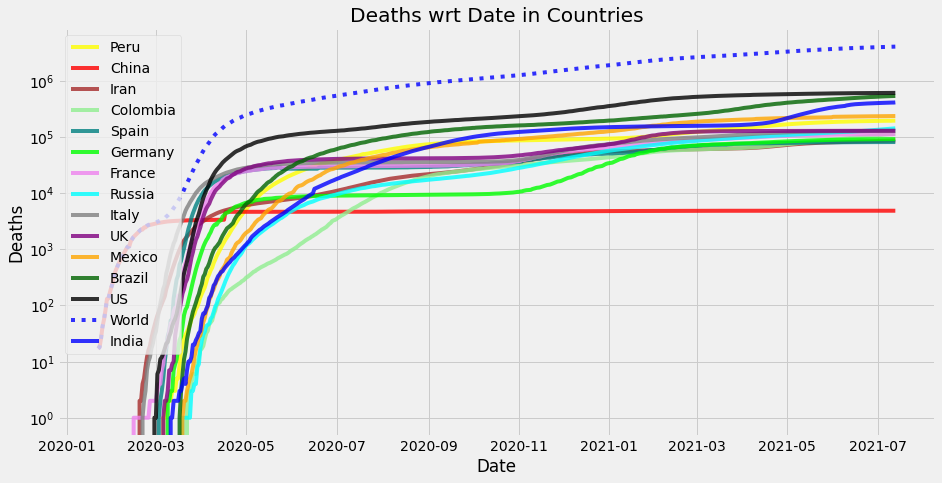

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-09,42766,508345,48241,57737,9319,35885,1386,25299,4639,885,21879,21536,16596,27,0
2021-07-10,41506,405467,9038,48504,9581,31835,1394,24607,4696,809,0,0,11664,1,4629
2021-07-11,37154,344869,6164,20937,3779,31382,1391,24544,4256,568,0,0,17664,52,1962
2021-07-12,0,446519,35013,17031,3074,34810,887,24649,1268,553,33932,58988,20829,29,780
2021-07-13,71771,531553,25919,45022,11137,36500,1530,24211,6958,1027,43960,0,22750,25,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-09,64805,416015,17308,58194,5053,20104,1366,19592,2927,1388,9463,26366,13015,25,2806
2021-07-10,63252,415311,16757,57548,5354,20886,1368,19927,3045,1350,8832,24608,12925,23,2928
2021-07-11,61512,410615,16050,55107,5249,21586,1369,20235,3126,1298,8243,22968,13241,25,2863
2021-07-12,57411,413009,17314,52569,5104,22467,1337,20529,3002,1248,9956,25369,13746,25,2725
2021-07-13,58368,420912,17888,52066,5506,23403,1350,20774,3266,1233,12223,23678,14347,25,2543


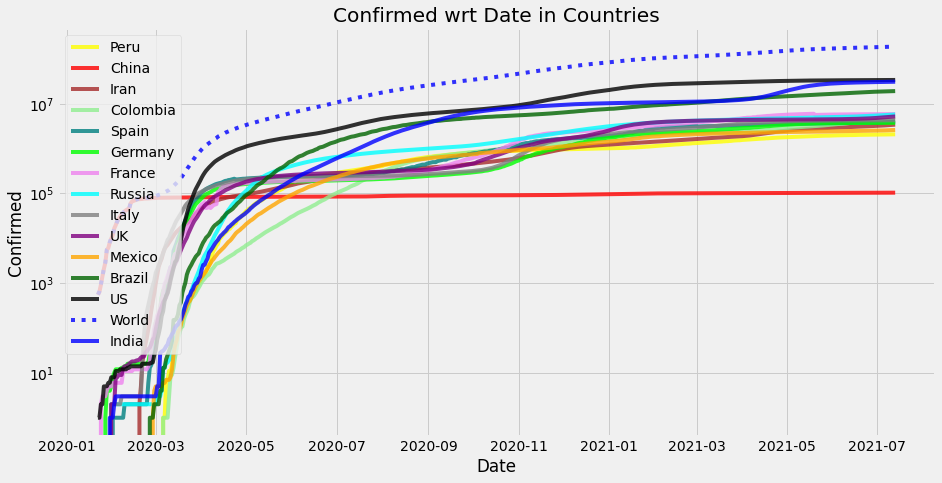

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-09,1206,8447,504,1509,217,30,25,715,19,35,6,576,146,0,0
2021-07-10,895,6042,139,1205,232,34,12,740,19,7,0,0,151,0,-679
2021-07-11,724,6681,24,595,62,26,7,739,4,2,0,0,165,0,1157
2021-07-12,0,7300,243,745,89,6,13,700,28,27,17,1604,182,0,101
2021-07-13,2642,9671,372,1605,219,50,20,767,54,27,13,0,166,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-09,1057.04,8203.21,276.05,1560.53,191.03,23.18,25.13,649.82,30.06,40.81,17.51,591.23,141.27,0.10,181.02
2021-07-10,1036.78,7933.06,258.92,1516.09,196.15,24.53,23.48,661.09,28.68,36.58,15.32,517.33,142.48,0.09,73.52
2021-07-11,997.68,7776.55,229.56,1400.95,179.38,24.72,21.42,670.83,25.59,32.26,13.41,452.66,145.30,0.08,208.95
2021-07-12,872.97,7716.98,231.24,1318.96,168.08,22.38,20.37,674.48,25.89,31.60,13.86,596.58,149.88,0.07,195.46
2021-07-13,1094.10,7961.23,248.83,1354.71,174.45,25.83,20.32,686.04,29.41,31.03,13.75,522.01,151.90,0.06,171.03


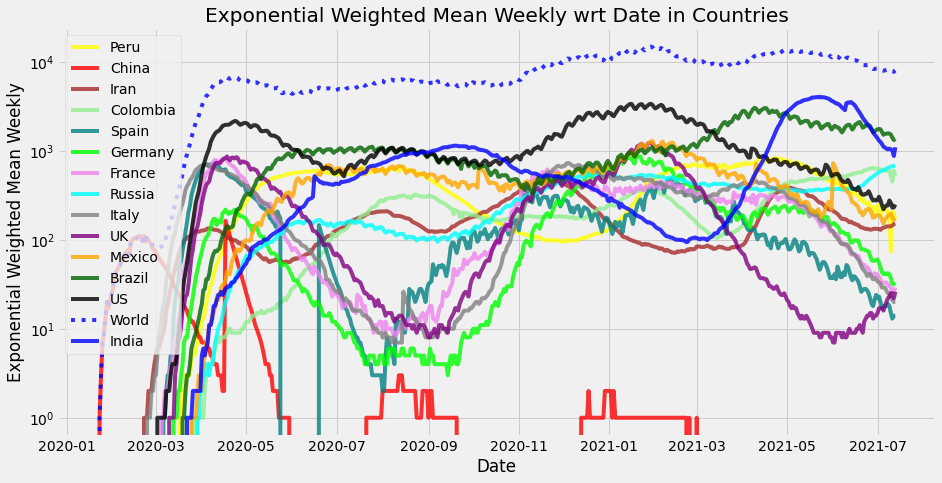

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

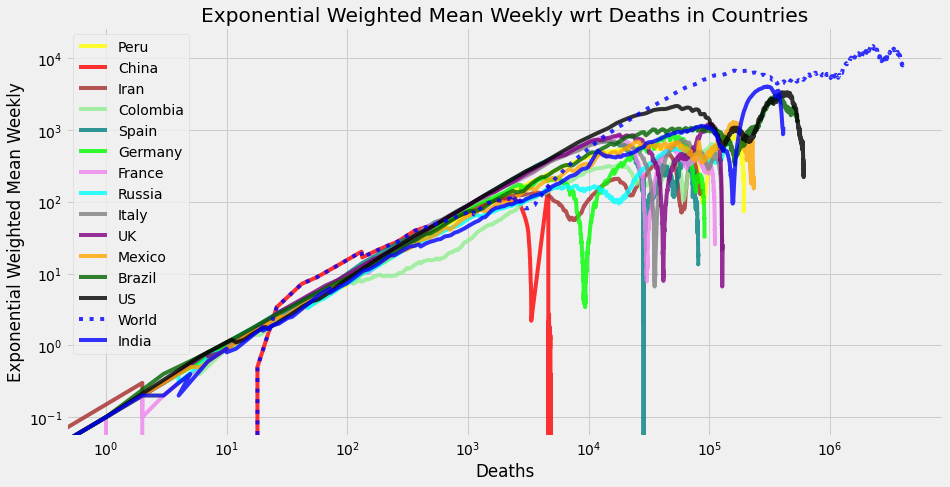

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

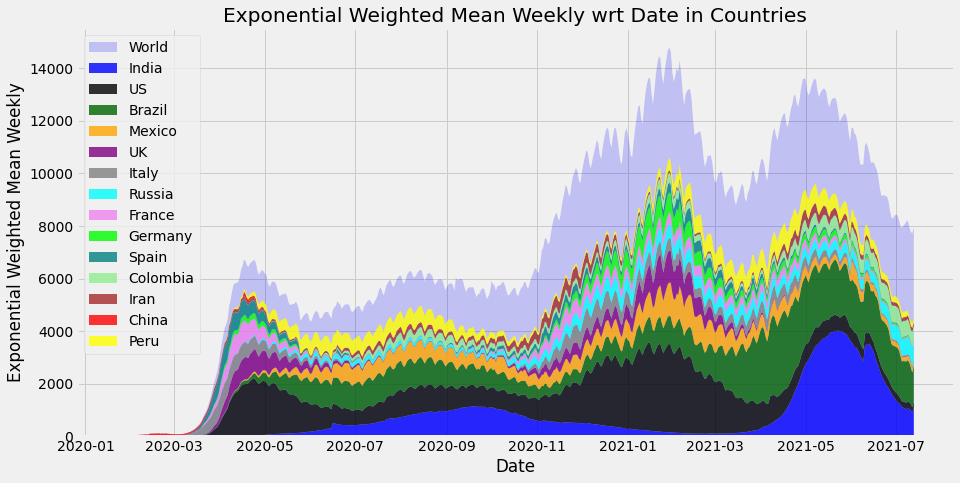

In [20]:
stackplotter(AVG, name)

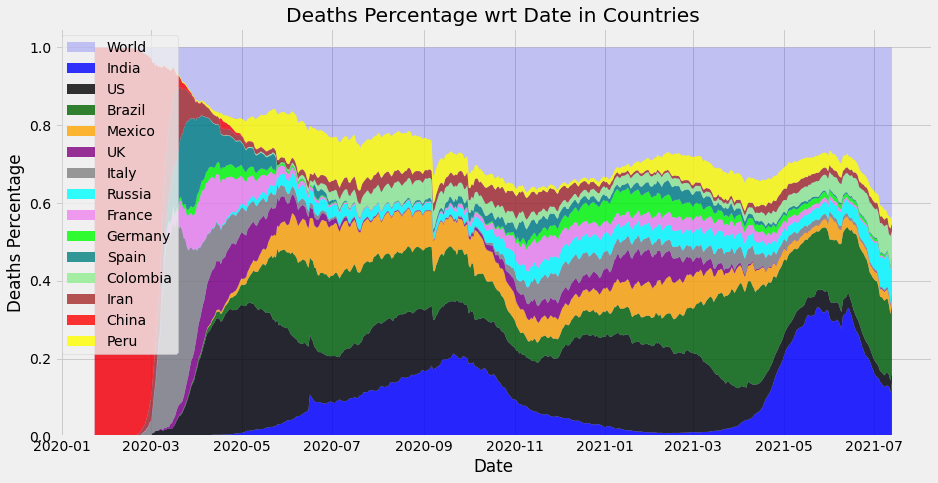

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

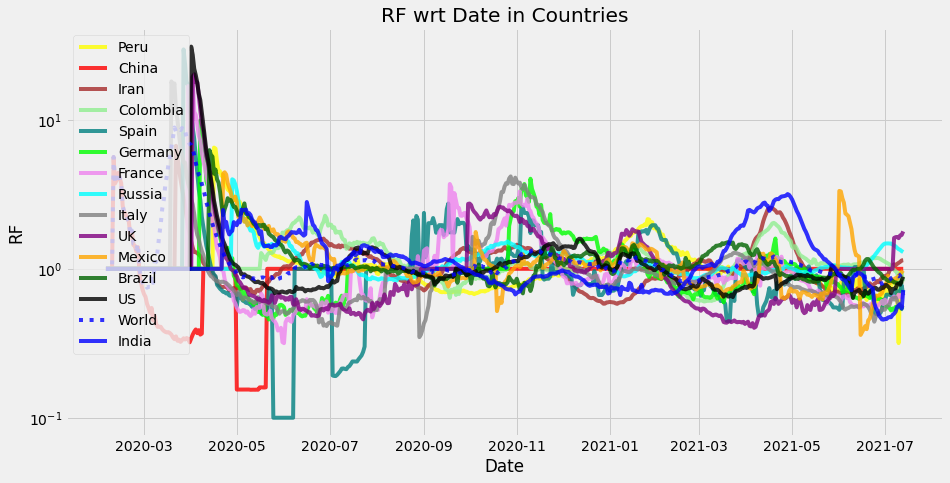

In [23]:
plotter(Reproductivity, 'RF')

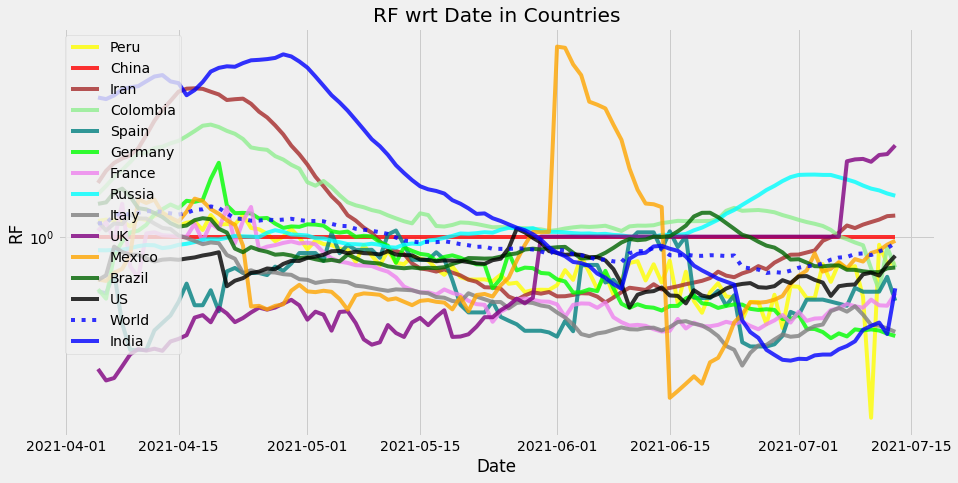

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

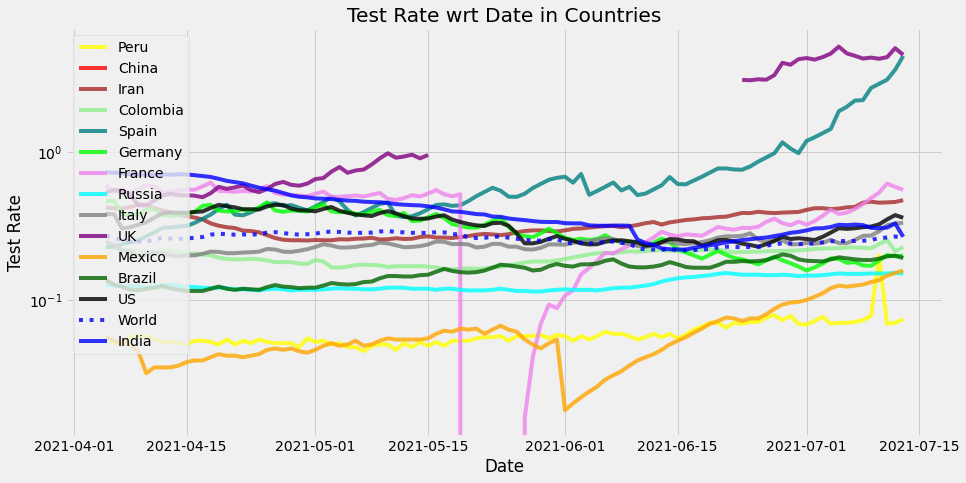

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

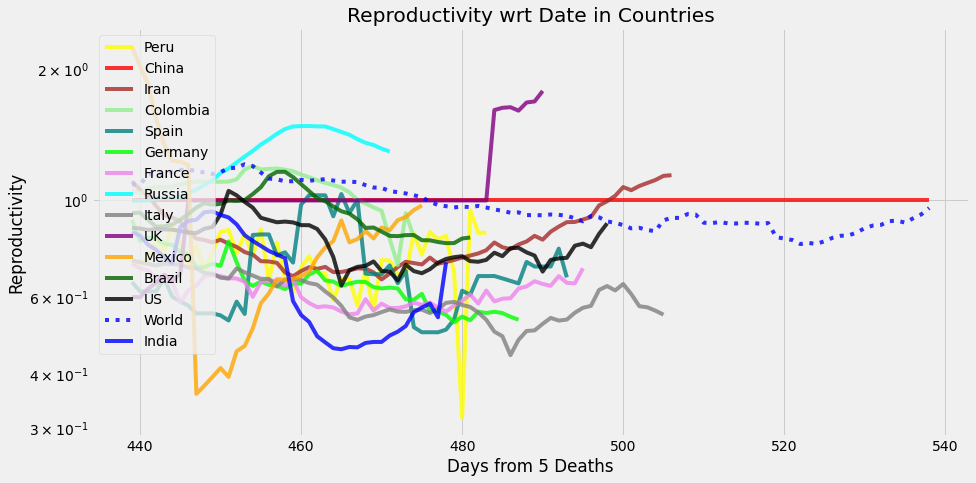

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

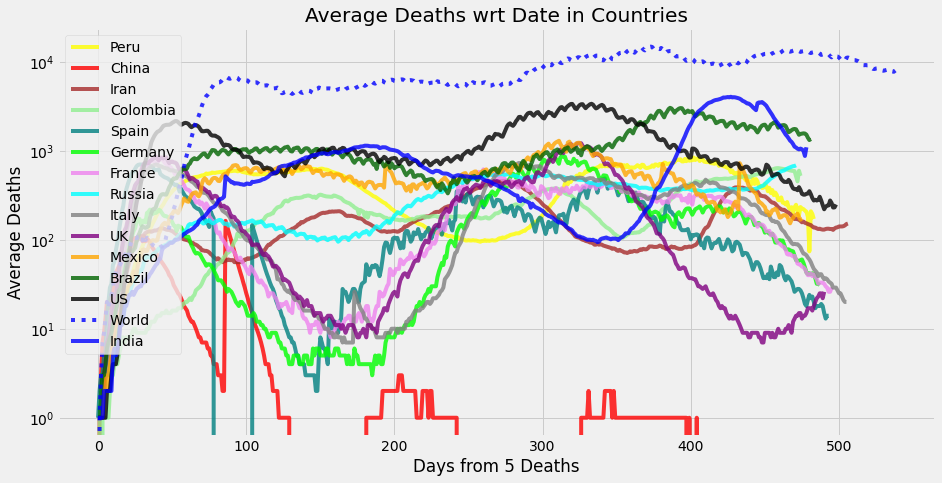

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

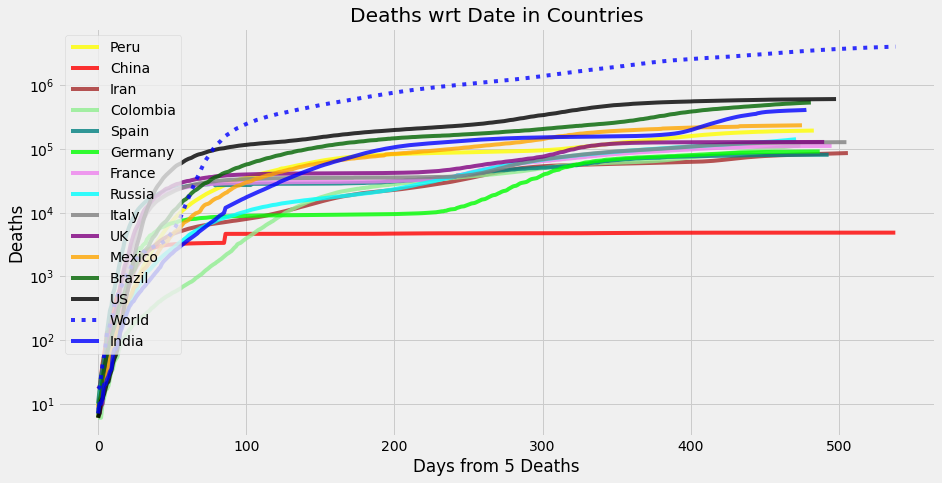

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4048746,9671,7935.71,7961.23,0.9609,187794140,0.264,420912,809.75
US,607771,372,261.29,248.83,0.8857,33914880,0.359,17888,121.55
Brazil,535838,1605,1278.00,1354.71,0.8221,19151993,0.192,52066,107.17
India,411406,2642,1027.86,1094.10,0.7205,30946147,0.267,58368,82.28
Mexico,235277,219,188.43,174.45,0.9740,2604711,0.158,5506,47.06
Peru,194488,0,128.57,171.03,0.8429,2081557,0.074,2543,38.90
Russia,142102,767,728.14,686.04,1.2962,5762211,0.151,20774,28.42
UK,128747,50,30.71,25.83,1.7838,5210472,4.530,23403,25.75
Italy,127808,20,14.86,20.32,0.5468,4273693,0.332,1350,25.56


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4048746,9671,7935.71,7961.23,0.9609,187794140,0.264,420912,809.75
Brazil,535838,1605,1278.00,1354.71,0.8221,19151993,0.192,52066,107.17
India,411406,2642,1027.86,1094.10,0.7205,30946147,0.267,58368,82.28
Indonesia,68219,864,907.29,735.84,2.1491,2615529,0.180,26470,13.64
Russia,142102,767,728.14,686.04,1.2962,5762211,0.151,20774,28.42
Colombia,113335,0,473.71,522.01,0.8227,4530610,0.227,23678,22.67
Argentina,99640,385,379.57,417.97,0.8347,4682960,0.222,18520,19.93
South Africa,65142,633,359.14,325.66,2.0763,2219316,0.237,15433,13.03
US,607771,372,261.29,248.83,0.8857,33914880,0.359,17888,121.55


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4048746


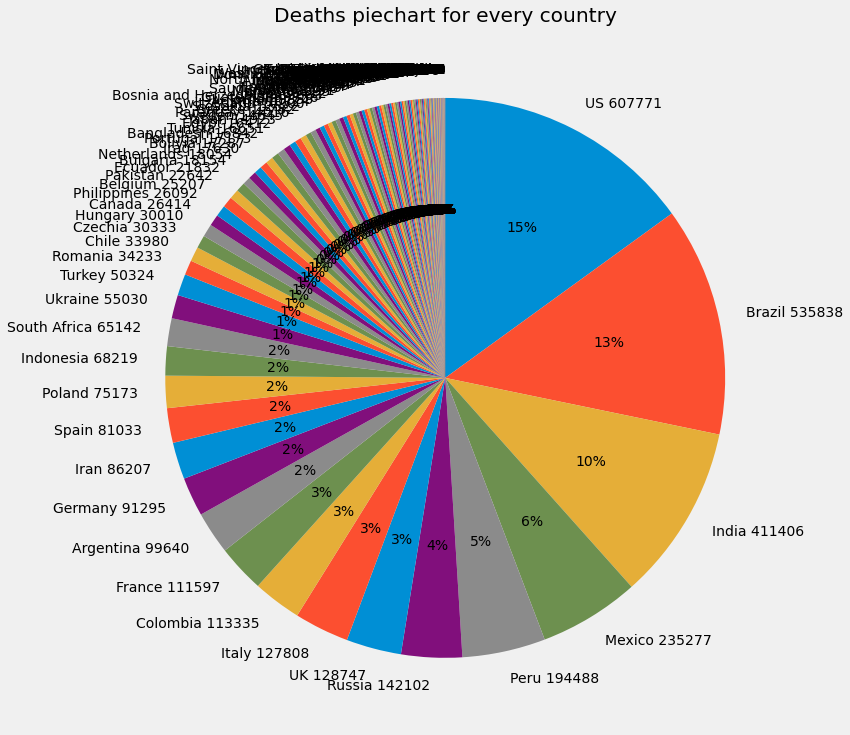

In [35]:
piechart('Deaths')

World total:  7935


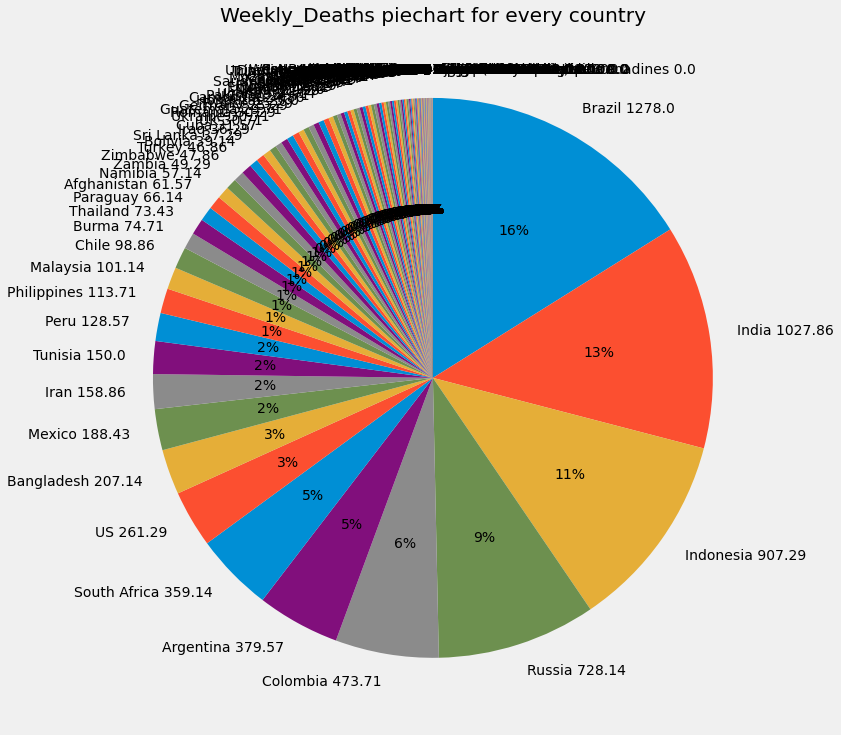

In [36]:
piechart('Weekly_Deaths')

World total:  9671


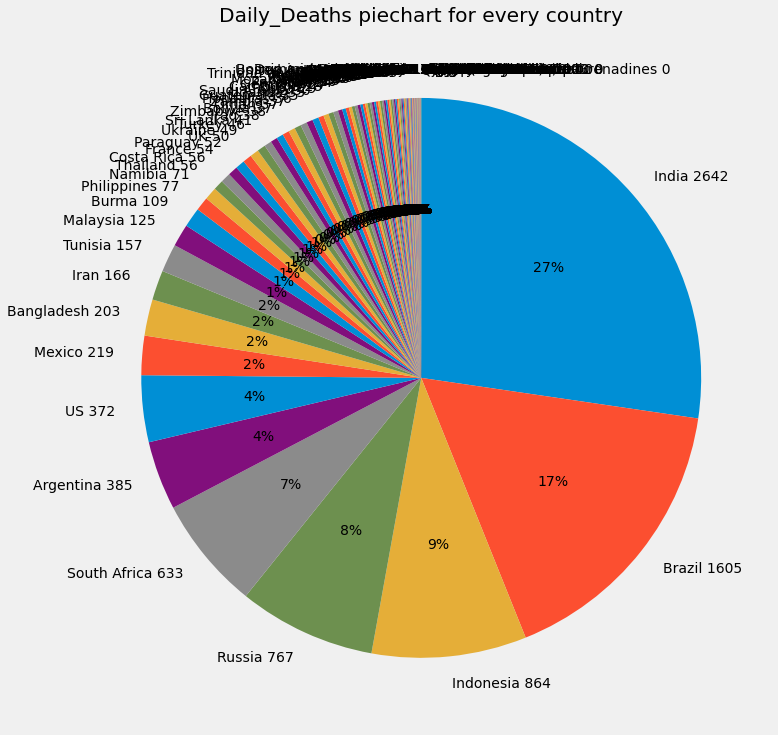

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-14


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

809749200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master a0e9ae0] `date` update
 1 file changed, 1500 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (86%)


To https://github.com/Arrowheadahp/COVID-19.git
   c894993..a0e9ae0  master -> master
